# **IMPORT LIBRARY YANG DIBUTUHKAN**

In [9]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# **GATHERING / LOAD DATA**

In [10]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


terlihat bahwa terdapat 9 kolom yang masing-masing kolom memiliki data sebanyak 100000. Nantinya, data di kolom gender dan smooking_history akan di labeli dengan angka.

# **ASSESSING DATA**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## **Missing Value**

In [12]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## **Invalid Value**

In [13]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## **Duplicate Data**

In [14]:
df.duplicated().sum()

3854

# **CLEANING DATA**

Karena yang perlu dibersihkan hanya data duplikat, maka kita cukup melakukan drop baris yang duplikat saja

In [15]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


# **EXPLANATORY DATA ANALYSIS**

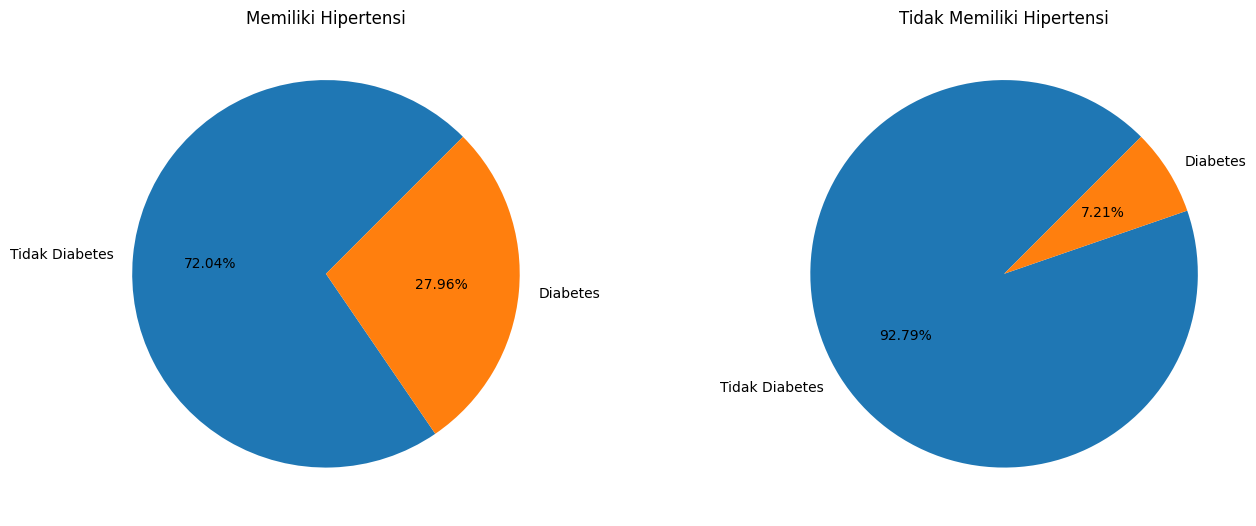

In [17]:
plt.figure(figsize = [15,15])

plt.subplot(1,2,1)
plt.pie(df[df['hypertension'] == 1]['diabetes'].value_counts().values, labels=['Tidak Diabetes', 'Diabetes'], autopct='%1.2f%%', startangle=45)
plt.title('Memiliki Hipertensi')


plt.subplot(1,2,2)
plt.pie(df[df['hypertension'] == 0]['diabetes'].value_counts().values, labels=['Tidak Diabetes', 'Diabetes'], autopct='%1.2f%%', startangle=45)
plt.title("Tidak Memiliki Hipertensi")

plt.subplots_adjust(wspace=0.4)
plt.show()

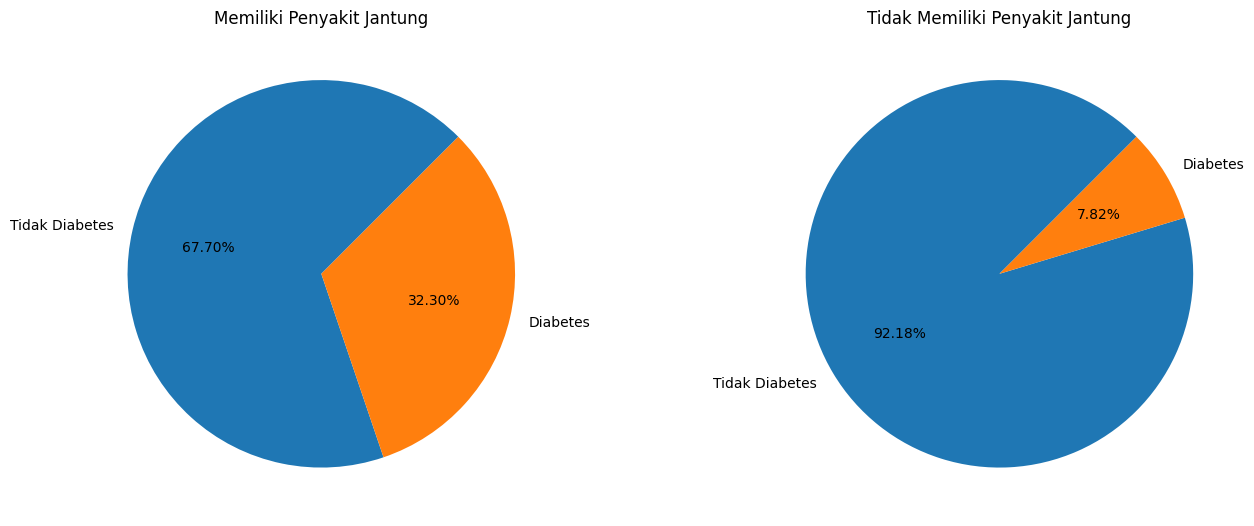

In [18]:
plt.figure(figsize = [15,15])

plt.subplot(1,2,1)
plt.pie(df[df['heart_disease'] == 1]['diabetes'].value_counts().values, labels=['Tidak Diabetes', 'Diabetes'], autopct='%1.2f%%', startangle=45)
plt.title('Memiliki Penyakit Jantung')


plt.subplot(1,2,2)
plt.pie(df[df['heart_disease'] == 0]['diabetes'].value_counts().values, labels=['Tidak Diabetes', 'Diabetes'], autopct='%1.2f%%', startangle=45)
plt.title("Tidak Memiliki Penyakit Jantung")

plt.subplots_adjust(wspace=0.4)
plt.show()

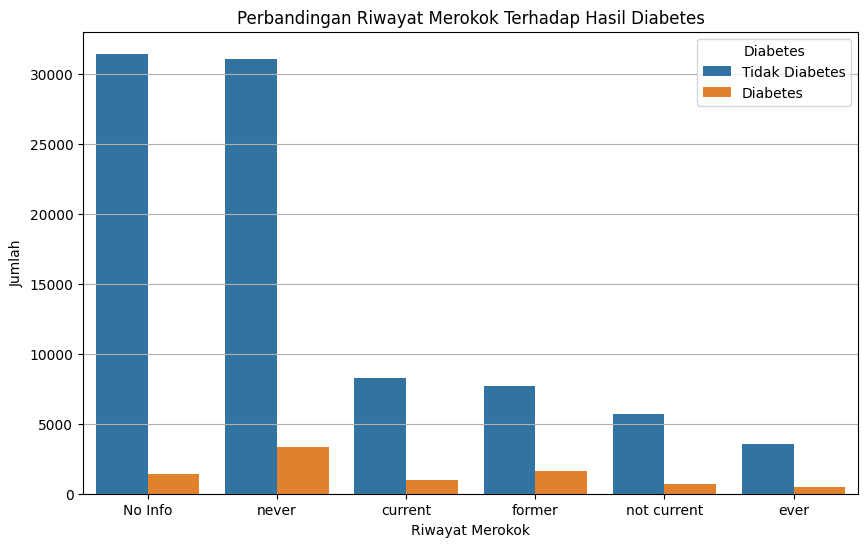

In [19]:
import seaborn as sns

non_diabetes_counts = df[df['diabetes'] == 0]['smoking_history'].value_counts()
sorted_categories = non_diabetes_counts.index

plt.figure(figsize=(10, 6))
sns.countplot(
    x='smoking_history',
    hue='diabetes',
    data=df,
    order=sorted_categories)
plt.title('Perbandingan Riwayat Merokok Terhadap Hasil Diabetes')
plt.xlabel('Riwayat Merokok')
plt.ylabel('Jumlah')
plt.legend(title='Diabetes', loc='upper right', labels=['Tidak Diabetes', 'Diabetes'])
plt.grid(axis='y')
plt.show()

In [20]:
tipe_bmi = []

for tipe in df['bmi']:
  if tipe <= 18.5:
    tipe_bmi.append('underweight')
  elif(tipe > 18.5 and tipe <= 24.9):
    tipe_bmi.append('normal')
  elif(tipe > 24.9 and tipe <=29.9):
    tipe_bmi.append('overweight')
  else :
    tipe_bmi.append('obesity')

df['tipe_bmi'] = tipe_bmi

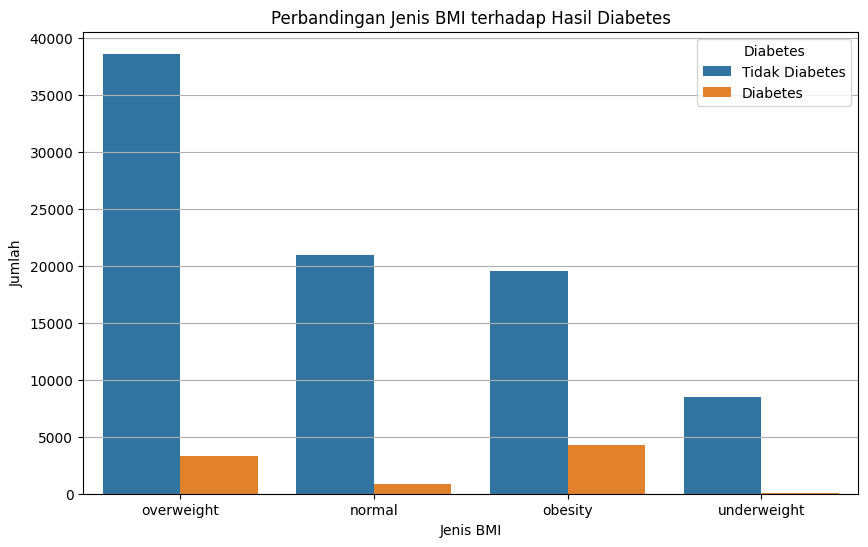

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(
    x='tipe_bmi',
    hue='diabetes',
    data=df)
plt.title('Perbandingan Jenis BMI terhadap Hasil Diabetes')
plt.xlabel('Jenis BMI')
plt.ylabel('Jumlah')
plt.legend(title='Diabetes', loc='upper right', labels=['Tidak Diabetes', 'Diabetes'])
plt.grid(axis='y')
plt.show()

In [22]:
blood_glucose = []

for level in df['blood_glucose_level']:
  if level <= 99:
    blood_glucose.append('normal')
  elif (level > 99) and (level <=125):
    blood_glucose.append('prediabetes')
  else :
    blood_glucose.append('diabetes')

df['blood_glucose_test'] = blood_glucose

In [23]:
print("Jumlah orang yang memiliki gula darah normal dan terkena diabetes sebanyak = "  ,df[(df['blood_glucose_test'] == 'normal') & (df['diabetes'] == 1)].shape[0])
print("Jumlah orang yang memiliki gula darah normal dan tidak terkena diabetes sebanyak = "  ,df[(df['blood_glucose_test'] == 'normal') & (df['diabetes'] == 0)].shape[0])
print("\n")
print("Jumlah orang yang memiliki gula darah prediabetes dan terkena diabetes sebanyak = "  ,df[(df['blood_glucose_test'] == 'prediabetes') & (df['diabetes'] == 1)].shape[0])
print("Jumlah orang yang memiliki gula darah Prediabetes dan tidak terkena diabetes sebanyak = "  ,df[(df['blood_glucose_test'] == 'prediabetes') & (df['diabetes'] == 0)].shape[0])
print("\n")
print("Jumlah orang yang memiliki gula darah diabetes dan terkena diabetes sebanyak = "  ,df[(df['blood_glucose_test'] == 'diabetes') & (df['diabetes'] == 1)].shape[0])
print("Jumlah orang yang memiliki gula darah diabtes dan tidak terkena diabetes sebanyak = "  ,df[(df['blood_glucose_test'] == 'diabetes') & (df['diabetes'] == 0)].shape[0])

Jumlah orang yang memiliki gula darah normal dan terkena diabetes sebanyak =  0
Jumlah orang yang memiliki gula darah normal dan tidak terkena diabetes sebanyak =  20240


Jumlah orang yang memiliki gula darah prediabetes dan terkena diabetes sebanyak =  0
Jumlah orang yang memiliki gula darah Prediabetes dan tidak terkena diabetes sebanyak =  6774


Jumlah orang yang memiliki gula darah diabetes dan terkena diabetes sebanyak =  8482
Jumlah orang yang memiliki gula darah diabtes dan tidak terkena diabetes sebanyak =  60650


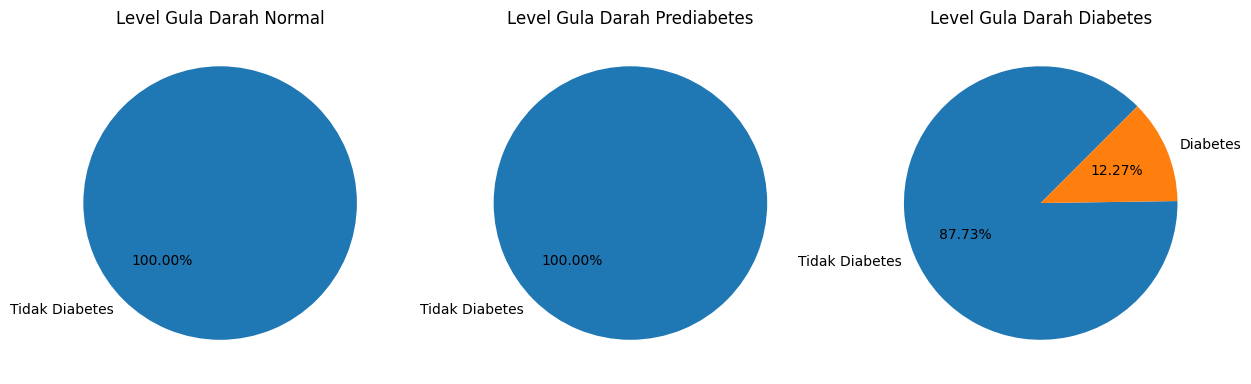

In [24]:
plt.figure(figsize=[15,15])

plt.subplot(1,3,1)
plt.pie(df[df['blood_glucose_test']=='normal']['diabetes'].value_counts().values, labels=['Tidak Diabetes'], autopct='%1.2f%%', startangle=45)
plt.title('Level Gula Darah Normal')


plt.subplot(1,3,2)
plt.pie(df[df['blood_glucose_test'] == 'prediabetes']['diabetes'].value_counts().values, labels = ['Tidak Diabetes'], autopct='%1.2f%%',startangle = 45)
plt.title('Level Gula Darah Prediabetes')

plt.subplot(1,3,3)
plt.pie(df[df['blood_glucose_test'] == 'diabetes']['diabetes'].value_counts().values, labels = ['Tidak Diabetes', 'Diabetes'], autopct='%1.2f%%', startangle = 45)
plt.title('Level Gula Darah Diabetes')
plt.show()

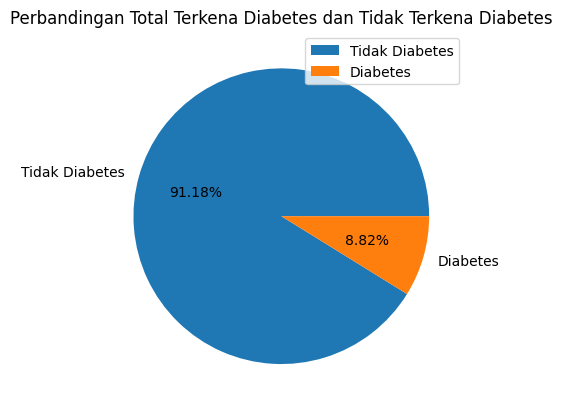

In [25]:
plt.pie(df['diabetes'].value_counts().values, labels=['Tidak Diabetes', 'Diabetes'], autopct='%1.2f%%')
plt.legend()
plt.title('Perbandingan Total Terkena Diabetes dan Tidak Terkena Diabetes')
plt.show()

# **PREPROCESSING DATA UNTUK PREDIKSI**


## **Penghapusan Kolom Yang Ditambah Pada EDA**

In [26]:
df.drop(columns='blood_glucose_test', inplace=True)

## **Proses Pelabelan Data**

Data yang ada di kolom 'gender' dan 'smoking_history akan diubah menjadi angka. Pada kolom 'smoking_history' diubah menjadi:

- No Info : -1
- never : 0
- former : 1
- current : 2
- not current : 3
- ever : 4

Sedangkan pada kolom gender akan menjadi :

- Female : 0
- Male : 1


In [27]:
df.drop(columns='tipe_bmi', inplace=True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [28]:
df_preprocessing = df.copy()

df_preprocessing['smoking_history']=df_preprocessing['smoking_history'].map({'No Info':-1,'never':0,'former':1,'current':2,'not current':3,'ever':4})
df_preprocessing['gender'] = df_preprocessing['gender'].map({'Female':0, 'Male':1, 'Other':2})

In [29]:
df_preprocessing

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,-1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,-1,24.60,4.8,145,0
99996,0,2.0,0,0,-1,17.37,6.5,100,0
99997,1,66.0,0,0,1,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [30]:
df_preprocessing.shape

(96146, 9)

In [31]:
df_preprocessing['diabetes'].value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

## **Standarisasi Data / Skalasi Data**

yang akan di skalasi yaitu hanya kolom independen saja. Jadi buat satu variabel yang akan menampung dari kolom 1 sampai 8.

In [32]:
X = df_preprocessing.drop(columns='diabetes', axis=1)

In [33]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [34]:
standarized_data = scaler.transform(X)

In [35]:
print(standarized_data)

[[-8.43459189e-01  1.70083970e+00 -2.90050377e-01 ... -3.14947071e-01
   9.94562951e-01  4.35538650e-02]
 [-8.43459189e-01  5.43372045e-01 -2.90050377e-01 ... -2.15895425e-04
   9.94562951e-01 -1.42309603e+00]
 [ 1.18376945e+00 -6.14095608e-01 -2.90050377e-01 ... -2.15895425e-04
   1.55970122e-01  4.83548835e-01]
 ...
 [ 1.18376945e+00  1.07758788e+00 -2.90050377e-01 ...  7.51422735e-02
   1.55970122e-01  4.10216340e-01]
 [-8.43459189e-01 -7.92167555e-01 -2.90050377e-01 ...  1.19664914e+00
  -1.42803856e+00 -9.34212734e-01]
 [-8.43459189e-01  6.76926005e-01 -2.90050377e-01 ... -7.22767750e-01
   9.94562951e-01 -1.17865438e+00]]


In [36]:
X = standarized_data
y = df_preprocessing['diabetes']

In [37]:
print(X)
print(y)

[[-8.43459189e-01  1.70083970e+00 -2.90050377e-01 ... -3.14947071e-01
   9.94562951e-01  4.35538650e-02]
 [-8.43459189e-01  5.43372045e-01 -2.90050377e-01 ... -2.15895425e-04
   9.94562951e-01 -1.42309603e+00]
 [ 1.18376945e+00 -6.14095608e-01 -2.90050377e-01 ... -2.15895425e-04
   1.55970122e-01  4.83548835e-01]
 ...
 [ 1.18376945e+00  1.07758788e+00 -2.90050377e-01 ...  7.51422735e-02
   1.55970122e-01  4.10216340e-01]
 [-8.43459189e-01 -7.92167555e-01 -2.90050377e-01 ...  1.19664914e+00
  -1.42803856e+00 -9.34212734e-01]
 [-8.43459189e-01  6.76926005e-01 -2.90050377e-01 ... -7.22767750e-01
   9.94562951e-01 -1.17865438e+00]]
0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96146, dtype: int64


## **Pembagian Data Latih dan Data Testing**

Perbandingan antara data latih dan data testing adalalah 80% : 20%

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=2)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(96146, 8) (76916, 8) (19230, 8)


#**PEMBENTUKAN MODEL MENGGUNAKAN ALGORITMA SVC (SUPPORT VECTOR CLASSIFIER)**

In [40]:
classifier = svm.SVC(kernel='linear')

In [41]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

# **PERHITUNGAN AKURASI DAN HASIL**

In [42]:
X_train_predict = classifier.predict(X_train)
train_data_accuracy = accuracy_score(X_train_predict, y_train)

In [43]:
print("Accuracy Training : ", train_data_accuracy)

Accuracy Training :  0.959267252587238


In [44]:
X_test_predict = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predict, y_test)

In [45]:
print("Accuracy Testing : ", test_data_accuracy)

Accuracy Testing :  0.9600624024960999


## **Contoh Pengimplementasian**

In [46]:
input_data = (1, 50.0, 1, 0, 2, 27.32, 5.7, 260)


input_data_array = np.array(input_data)
input_reshape = input_data_array.reshape(1,-1)
std_data = scaler.transform(input_reshape)

prediction = classifier.predict(std_data)
# print(prediction)
if(prediction[0] == 0):
  print("Pasien tidak terkena diabets")
else :
  print("Pasien terkena diabetes")


Pasien terkena diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **PENYIMPANAN MODEL DAN DATASET YANG TELAH BERSIH**

In [47]:
df_preprocessing.to_csv('diabets_dataset_clean.csv', index=False)

In [48]:
filename = "diabetes_model.sav"
joblib.dump(classifier, filename)

['diabetes_model.sav']